In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split as train
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis

# Чтение и обработка данных

In [2]:
# Чтение данных
df = pd.read_csv('datasets_117_1001_responses.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
df['Smoking'].replace(to_replace=['never smoked', 
                                  'tried smoking', 
                                  'former smoker', 
                                  'current smoker'], 
                      value=[1.0, 
                             2.0, 
                             3.0, 
                             4.0], 
                      inplace=True)
df['Alcohol'].replace(to_replace=['drink a lot', 
                                  'social drinker', 
                                  'never'], 
                      value=[3.0, 
                             2.0, 
                             1.0], 
                      inplace=True)
df['Punctuality'].replace(to_replace=['i am always on time', 
                                      'i am often early', 
                                      'i am often running late'], 
                      value=[3.0, 
                             2.0, 
                             1.0], 
                      inplace=True)
df['Lying'].replace(to_replace=['never', 
                                'only to avoid hurting someone', 
                                'sometimes', 
                                'everytime it suits me'], 
                      value=[1.0, 
                             2.0, 
                             3.0, 
                             4.0], 
                      inplace=True)
df['Internet usage'].replace(to_replace=['most of the day', 
                                         'few hours a day', 
                                         'less than an hour a day', 
                                         'no time at all'], 
                      value=[4.0, 
                             3.0, 
                             2.0, 
                             1.0], 
                      inplace=True)
df['Gender'].replace(to_replace=['female', 
                                 'male'], 
                      value=[1.0, 
                             2.0], 
                      inplace=True)
df['Left - right handed'].replace(to_replace=['right handed', 
                                              'left handed'], 
                      value=[1.0, 
                             2.0], 
                      inplace=True)
df['Education'].replace(to_replace=
                        ['currently a primary school pupil', 
                         'primary school', 
                         'secondary school', 
                         'college/bachelor degree', 
                         'masters degree', 
                         'doctorate degree'], 
                      value=[1.0, 
                             2.0, 
                             3.0, 
                             4.0, 
                             5.0, 
                             6.0], 
                      inplace=True)
df['Only child'].replace(to_replace=['no', 
                                     'yes'], 
                      value=[1.0, 
                             2.0], 
                      inplace=True)
df['Village - town'].replace(to_replace=['village', 
                                         'city'], 
                      value=[1.0, 
                             2.0], 
                      inplace=True)
df['House - block of flats'].replace(to_replace=['block of flats', 
                                                 'house/bungalow'], 
                      value=[1.0, 
                             2.0], 
                      inplace=True)

In [4]:
# Заполняем NaN'ы
# Для возраста, роста, веса используем округленное 
# среднее значение по столбцу, 
# а для остальных признаков - самое частое значение
for column in ['Age', 'Height', 'Weight']:
    df[column].fillna(np.around(df[column].mean()), inplace=True)
    
df.fillna(df.mode().iloc[0], inplace=True)

In [5]:
# Отделяем целевой признак от остальных 
# и конвертируем DataFrame в массивы Numpy
X = df.drop('Snakes', axis=1).to_numpy(dtype=np.float64)
y = df['Snakes'].to_numpy(dtype=np.float64)
X.shape[1]

149

In [6]:
# Определяем выбросы
lof = LocalOutlierFactor(n_neighbors=150)
lof.fit(X)

for i in range(0, 15):
    print("%.3f" % np.sort(lof.negative_outlier_factor_)[i], 
          end =' ')
    
outliers = np.where(lof.negative_outlier_factor_ < -1.4)

-4.773 -3.392 -2.857 -1.840 -1.777 -1.692 -1.682 -1.509 -1.457 -1.410 -1.289 -1.259 -1.239 -1.234 -1.229 

In [7]:
# Удаляем выбросы
X = np.delete(X, outliers, axis=0)
y = np.delete(y, outliers, axis=0)

In [8]:
# Стандартизация данных
X_scaled = preprocessing.scale(X)
X_scaled

array([[ 0.3985411 , -0.38973896, -0.95104005, ..., -0.58196914,
        -1.53850686, -0.82502865],
       [-1.1284363 ,  0.80945784, -0.95104005, ..., -0.58196914,
         0.64998085, -0.82502865],
       [ 0.3985411 ,  2.00865465, -0.95104005, ..., -0.58196914,
         0.64998085, -0.82502865],
       ...,
       [-1.1284363 , -0.38973896, -1.80706169, ...,  1.71830416,
         0.64998085, -0.82502865],
       [ 0.3985411 , -0.38973896, -0.0950184 , ..., -0.58196914,
         0.64998085, -0.82502865],
       [ 0.3985411 ,  2.00865465,  0.76100324, ..., -0.58196914,
        -1.53850686,  1.21207912]])

# Визуализация данных

In [9]:
target_ids = [1, 2, 3, 4, 5]
markers =  ['o', '^', 's', '*', 'X']

In [10]:
pca = PCA(n_components=2)
pca.fit(X_scaled, y)
X_pca = pca.transform(X_scaled)

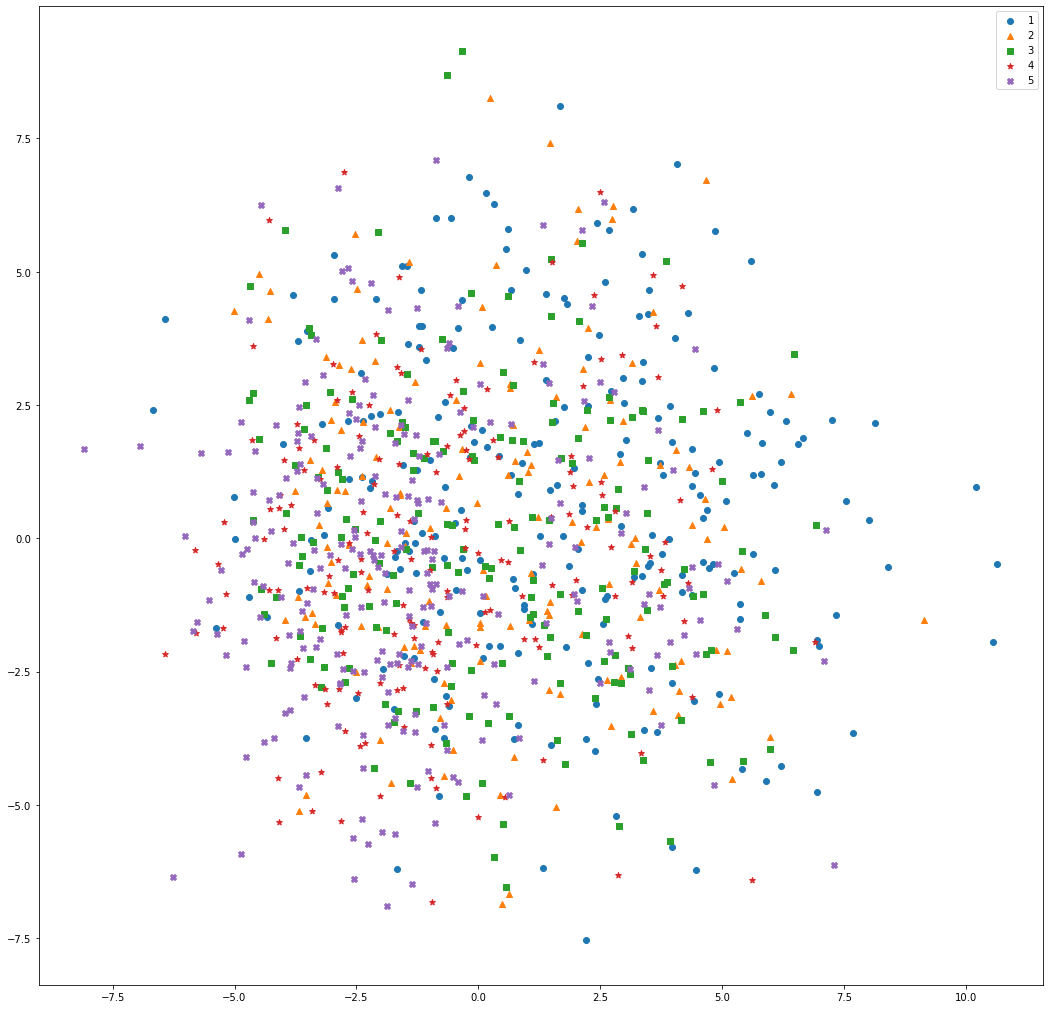

In [11]:
plt.figure(figsize = (18, 18))

for i, m in zip(target_ids, markers):
    plt.scatter(X_pca[y == i, 0], 
                X_pca[y == i, 1], 
                marker=m, 
                label=i)
    
plt.legend()
plt.savefig('PCA')

In [12]:
nca = NeighborhoodComponentsAnalysis(n_components=2)
nca.fit(X_scaled, y)
X_nca = nca.transform(X_scaled)

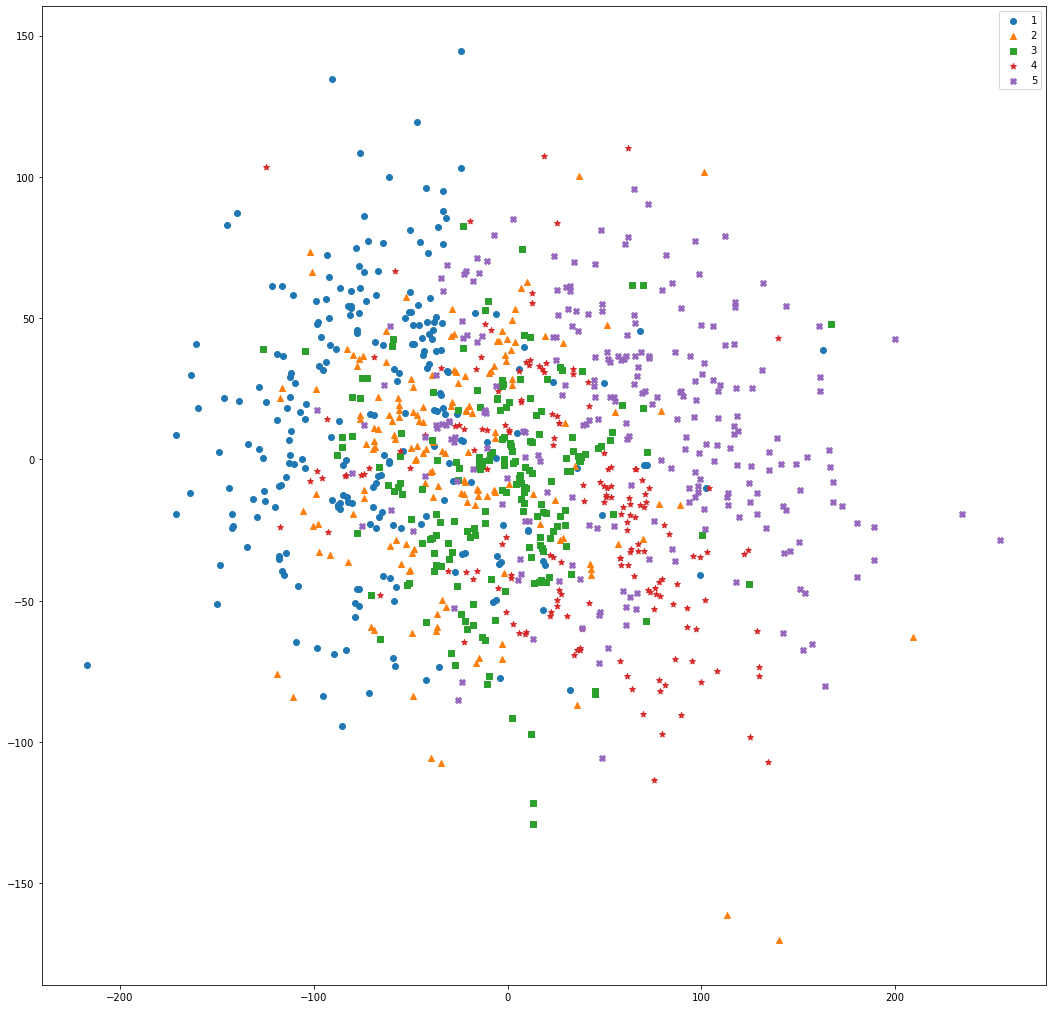

In [13]:
plt.figure(figsize = (18, 18))

for i, m in zip(target_ids, markers):
    plt.scatter(X_nca[y == i, 0], 
                X_nca[y == i, 1], 
                marker=m, 
                label=i)

plt.legend()
plt.savefig('NCA')

In [14]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_scaled, y)
X_lda = lda.transform(X_scaled)

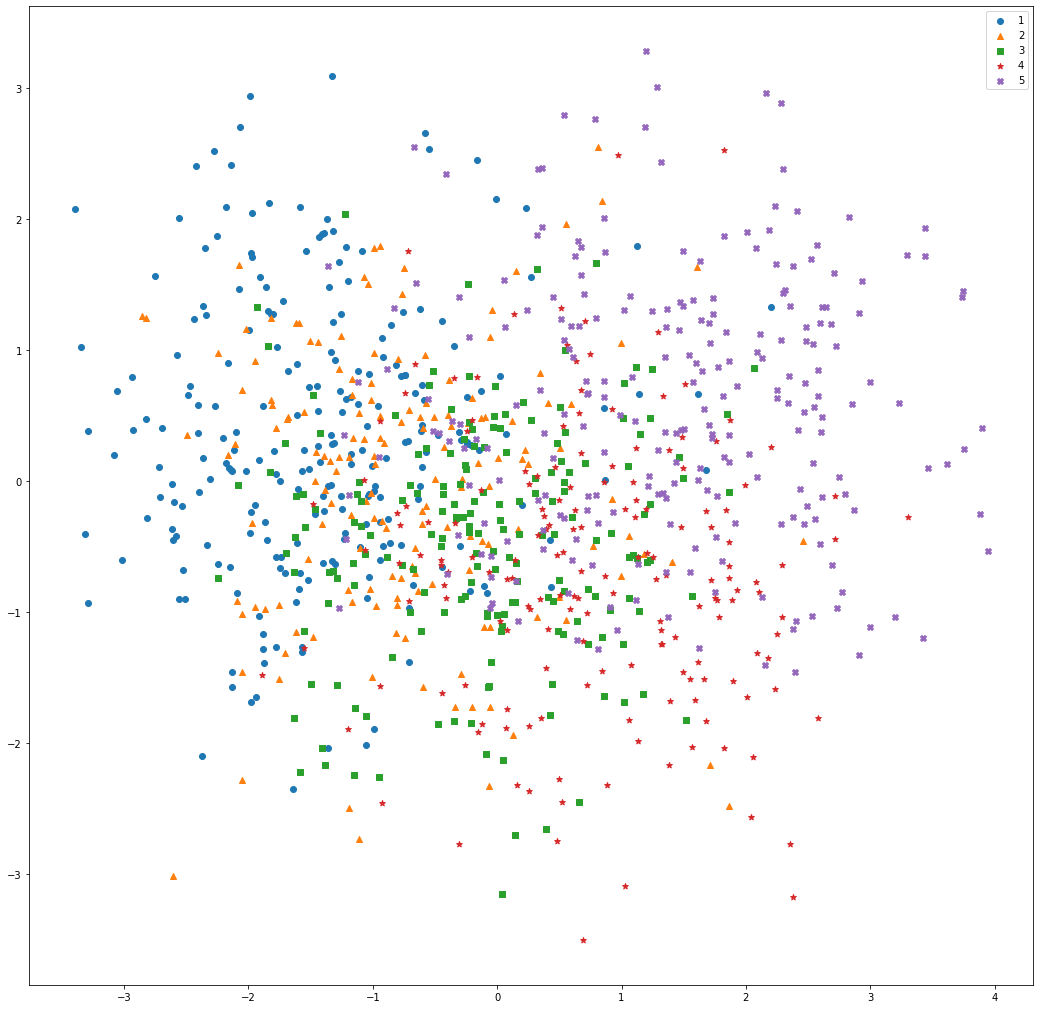

In [15]:
plt.figure(figsize = (18, 18))

for i, m in zip(target_ids, markers):
    plt.scatter(X_lda[y == i, 0], 
                X_lda[y == i, 1], 
                marker=m, 
                label=i)

plt.legend()
plt.savefig('LDA')

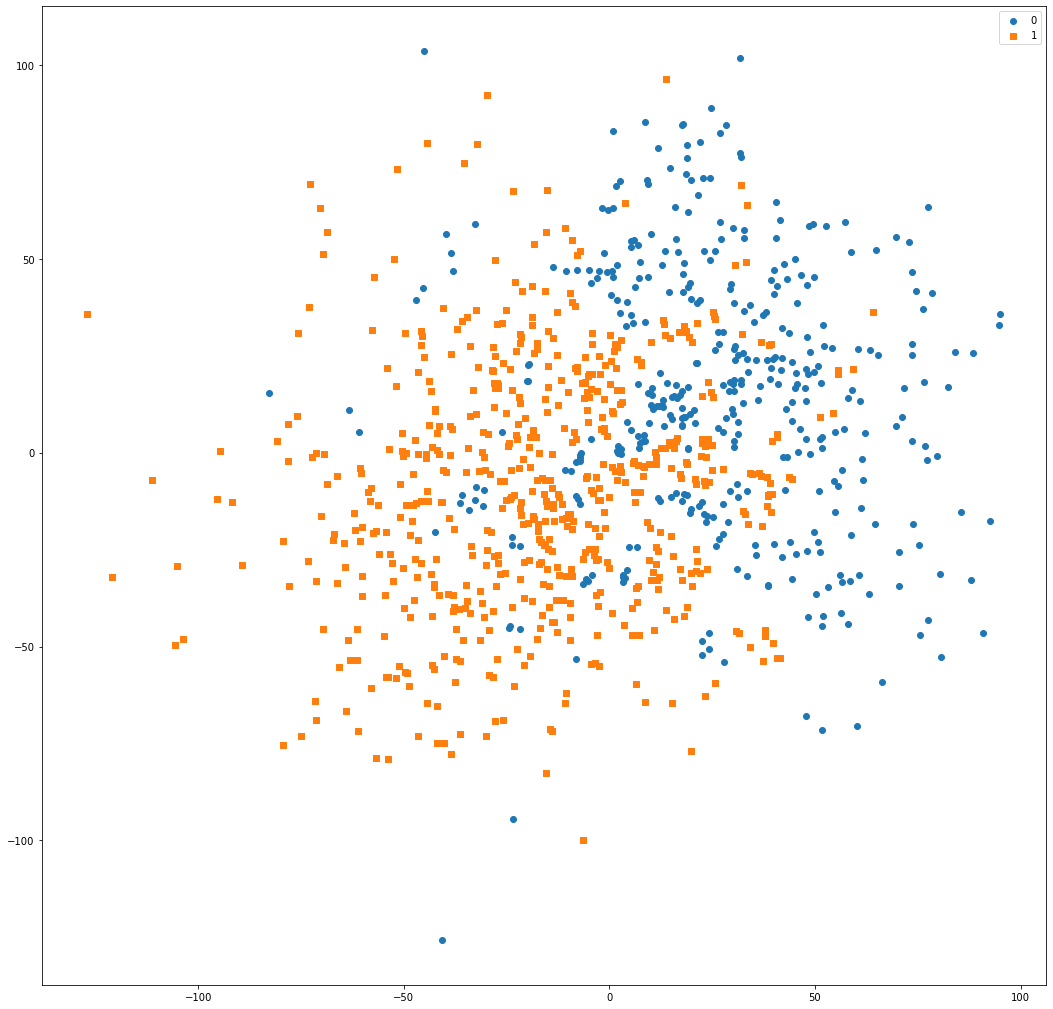

In [16]:
target_ids = [0, 1]
markers =  ['o', 's']

y[y < 3] = 0.0
y[y >= 3] = 1.0

nca = NeighborhoodComponentsAnalysis(n_components=2)
nca.fit(X_scaled, y)
X_nca = nca.transform(X_scaled)

plt.figure(figsize = (18, 18))

for i, m in zip(target_ids, markers):
    plt.scatter(X_nca[y == i, 0], 
                X_nca[y == i, 1], 
                marker=m, 
                label=i)

plt.legend()
plt.savefig('NCA_y')

# Случайный лес - классификация (RandomForestClassifier)

## Отбор признаков

Количество наилучших признаков: 3
Количество лучших признаков: 14


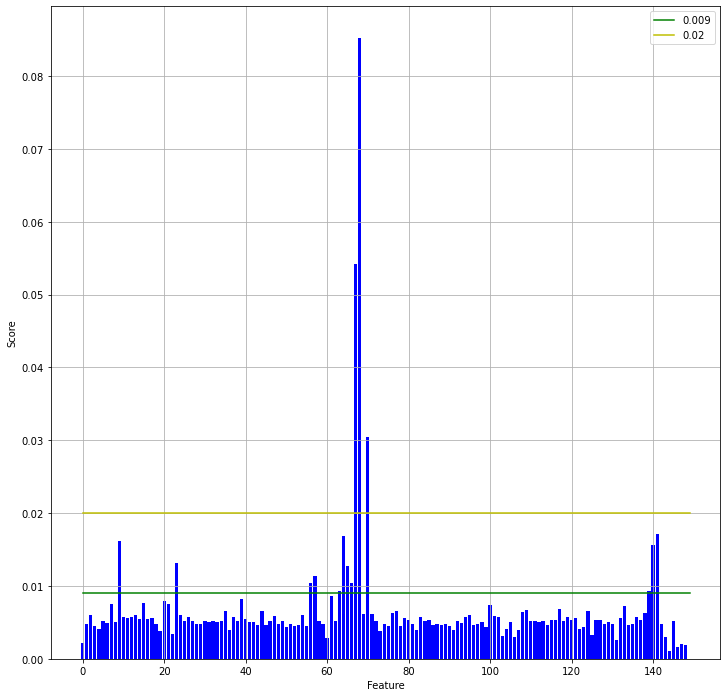

In [17]:
# Создаем классификатор и обучаем его на всех данных 
# для подсчета важности признаков при классификации
clf = RandomForestClassifier(n_estimators=400, 
                             n_jobs=-1, 
                             class_weight='balanced_subsample', 
                             random_state=42)
clf.fit(X_scaled, y) 

plt.figure(figsize = (12, 12))
plt.grid()
x_coor = np.arange(0, len(clf.feature_importances_))
plt.bar(x_coor, clf.feature_importances_, color='b')
plt.plot([0, len(clf.feature_importances_)], 
         [0.009, 0.009], 
         'g', 
         label='0.009')
plt.plot([0, len(clf.feature_importances_)], 
         [0.02, 0.02], 
         'y', 
         label='0.02')

plt.ylabel('Score')
plt.xlabel('Feature')
plt.legend()
plt.savefig('Features')

best_features = np.where(clf.feature_importances_ >= 0.009)[0]
the_best_features = np.where(clf.feature_importances_ >= 0.02)[0]
print("Количество наилучших признаков:", len(the_best_features))
print("Количество лучших признаков:", len(best_features))

In [18]:
# Важные признаки, больше всего коррелирующие с фобией змей
df.drop('Snakes', axis=1).iloc[:, best_features].head()

,Metal or Hardrock,Romantic,Celebrities,Shopping,Flying,Storm,Darkness,Heights,Spiders,Rats,Dangerous dogs,Age,Height,Weight
0,1.0,4.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,20.0,163.0,48.0
1,4.0,3.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,19.0,163.0,58.0
2,3.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,176.0,67.0
3,1.0,3.0,2.0,4.0,2.0,1.0,1.0,3.0,5.0,5.0,5.0,22.0,172.0,59.0
4,1.0,2.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0,20.0,170.0,59.0


In [19]:
# Самые важные признаки, коррелирующие с фобией змей
df.drop('Snakes', axis=1).iloc[:, the_best_features].head()

,Spiders,Rats,Dangerous dogs
0,1.0,3.0,3.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,5.0,5.0,5.0
4,1.0,2.0,4.0


In [20]:
# Используем рекурсивный отбор признаков с кросс-валидацией (RFECV) 
# для отбора значимых признаков
rfe = RFECV(estimator=clf, step=1, cv=10, n_jobs=-1)
rfe.fit(X_scaled, y)
X_rfe = rfe.transform(X_scaled)
print("Количество отобранных признаков:", X_rfe.shape[1])

Количество отобранных признаков: 19


In [21]:
# Проверяем оценку классификатора на кросс-валидации 
# без отбора признаков
scores = cross_val_score(clf, X_scaled, y, cv=5)
print("Количество признаков:", X_scaled.shape[1]) 
print("Оценки на каждом этапе кросс-валдиации:", scores) 
print("Средняя оценка на кросс-валдиации:", "%.3f" % scores.mean())

print()

# Проверяем оценку классификатора на кросс-валидации 
# c отбором признаков
scores = cross_val_score(clf, X_rfe, y, cv=5)
print("Количество признаков:", X_rfe.shape[1]) 
print("Оценки на каждом этапе кросс-валдиации:", scores) 
print("Средняя оценка на кросс-валдиации:", "%.3f" % scores.mean())

Количество признаков: 149
Оценки на каждом этапе кросс-валдиации: [0.76  0.74  0.75  0.73  0.705]
Средняя оценка на кросс-валдиации: 0.737

Количество признаков: 19
Оценки на каждом этапе кросс-валдиации: [0.75  0.77  0.82  0.775 0.705]
Средняя оценка на кросс-валдиации: 0.764


In [22]:
# Подбираем оптимальные параметры для классификатора 
# без отбора признаков
params_to_test = {
    'criterion':['gini','entropy'],
    'max_depth':np.arange(6, 16),
    'min_samples_leaf':np.arange(1, 6),
    'min_samples_split':[2, 3, 5, 6]
}

grid_search = GridSearchCV(clf, 
                           param_grid=params_to_test, 
                           cv=10, 
                           n_jobs=-1)
grid_search.fit(X_scaled, y)
no_rfe = grid_search.best_estimator_
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=6, min_samples_leaf=4, n_estimators=400,
                       n_jobs=-1, random_state=42)

In [23]:
# Подбираем оптимальные параметры для классификатора
# с отобранными признаками
params_to_test = {
    'criterion':['gini','entropy'],
    'max_depth':np.arange(6, 16),
    'min_samples_leaf':np.arange(1, 6),
    'min_samples_split':[2, 3, 5, 6]
}

grid_search = GridSearchCV(clf, 
                           param_grid=params_to_test, 
                           cv=10, 
                           n_jobs=-1)
grid_search.fit(X_rfe, y)
with_rfe = grid_search.best_estimator_
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400, n_jobs=-1, random_state=42)

In [24]:
# Проверяем оценку классификатора с подобранными параметрами
# на кросс-валидации без отбора признаков
scores = cross_val_score(no_rfe, X_scaled, y, cv=5)
print("Количество признаков:", X_scaled.shape[1]) 
print("Оценки на каждом этапе кросс-валдиации:", scores) 
print("Средняя оценка на кросс-валдиации:", "%.3f" % scores.mean())

print()

# Проверяем оценку классификатора с подобранными параметрами
# на кросс-валидации c отбором признаков
scores = cross_val_score(with_rfe, X_rfe, y, cv=5)
print("Количество признаков:", X_rfe.shape[1])
print("Оценки на каждом этапе кросс-валдиации:", scores) 
print("Средняя оценка на кросс-валдиации:", "%.3f" % scores.mean())

Количество признаков: 149
Оценки на каждом этапе кросс-валдиации: [0.775 0.755 0.815 0.775 0.71 ]
Средняя оценка на кросс-валдиации: 0.766

Количество признаков: 19
Оценки на каждом этапе кросс-валдиации: [0.765 0.79  0.825 0.775 0.75 ]
Средняя оценка на кросс-валдиации: 0.781


In [25]:
# Тестируем модель
# Разделяем выборку случайным образом 
# на обучающую и тестовую (отношение 8 к 2), 
# обучаем модель, проверяем оценки, 
# выводим минимальную, максимальную и среднюю
scores_list_test = []
for i in range(0, 25):
    X_train, X_test, y_train, y_test = train(X_rfe, 
                                             y, 
                                             test_size=0.2)
    with_rfe.fit(X_train, y_train)
    scores_list_test.append(with_rfe.score(X_test, y_test))

print('Средняя оценка на тестовой выборке =', 
      "%.3f" % np.mean(scores_list_test))
print('Минимальная оценка на тестовой выборке =', 
      "%.3f" % min(scores_list_test))
print('Максимальная оценка на тестовой выборке =', 
      "%.3f" % max(scores_list_test))

Средняя оценка на тестовой выборке = 0.788
Минимальная оценка на тестовой выборке = 0.745
Максимальная оценка на тестовой выборке = 0.855
